<a href="https://colab.research.google.com/github/skumarudel/DSPS_SKumar/blob/master/HW3/Kolmogorov_smirnov_earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by Sajan Kumar
# Kolmogorov Smirnoff test, application to earthquake data

In [33]:
#all the imports I needed
from __future__ import print_function, division
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import numpy as np
%matplotlib inline
plt.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")
#plt.style.use('ggplot')

This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible". 
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law. 

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :


1 What is the test's Null Hypothsis that the K-S test tests?


**Answer:** Under the Null Hypoethesis, the K-S tests determine if the two data sets comes from the same distribution.


2 What is the "statistic" or "pivotal quantity" that the test uses?

**Answer:** The pivotal quantity or statistics measure by K-S test is calculation of absolute value of the maximum difference between the cumulative distributions of two datasets

$D = max | CDF_{1}(x) - CDF_{2}(x)|$ 

3 What does the probability distribution of this statistic depend on? 

**Answer:** The probability distribution of the KS statistics depends only upon the number of datapoints N in each data sets which we are comparing. More precisely the geometrica mean of the size of two datasets,
$\sqrt{\frac{N1N2}{N+N2}}$


see the example below, just for a proof

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


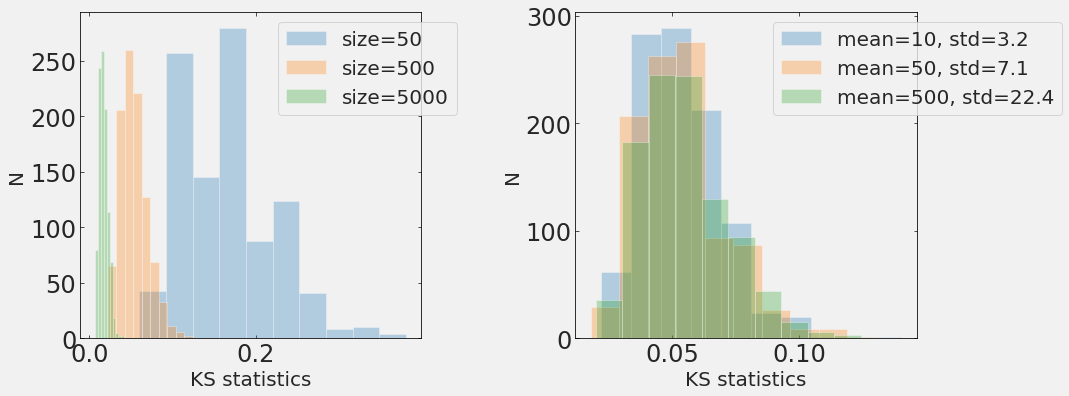

In [34]:
np.random.seed(56)
fig,axes = plt.subplots(1,2,figsize=(15,6))
mean = 10
loc = np.sqrt(mean)
for s in [50,500,5000]:
  distance = np.zeros(1000)
  for i in range(len(distance)):
      one = np.random.normal(mean,loc, size=s)
      two = np.random.normal(mean,loc, size=s)
      distance[i] = stats.ks_2samp(one,two)[0]
  axes[0].hist(distance, alpha=0.3, label="size={}".format(s)); 
axes[0].set_xlabel('KS statistics')
axes[0].set_ylabel('N')
#axes[0].set_title('Plotting KS stat for different size')
axes[0].legend(bbox_to_anchor=(0.55, 1.0))


for mean in [10,50,500]:
  distance = np.zeros(1000)
  for i in range(len(distance)):
      one = np.random.normal(mean,np.sqrt(mean), size=500)
      two = np.random.normal(mean,np.sqrt(mean), size=500)
      distance[i] = stats.ks_2samp(one,two)[0]
  axes[1].hist(distance, alpha=0.3, label="mean={}, std={:.1f}".format(mean, np.sqrt(mean))); 
axes[1].set_xlabel('KS statistics')
axes[1].set_ylabel('N')
#axes[1].set_title('Plotting KS stat for different value of distributions')
axes[1].legend(bbox_to_anchor=(0.55, 1.0));

plt.subplots_adjust(wspace=0.45);



You can see that when I change the size (Number of data points) of two distributions which I am using for comparison, the KS statisitcs looks differrent (left plot). However, when I keep the size same and change the distributions (changing means and standard deviation), the KS statistics distribution looks pretty much same (statistically) 

# Data retrieval

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict. 

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Think about what setting up data like this means for reproducibility. Did the author comply to reproducibility standards?__ Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries. 

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file earthquakes.csv which is in my GitHub repository https://github.com/fedhere/MLPNS2021/tree/main/HW2_NHRT takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. (remember to use the "raw" link)

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```. 

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [35]:
eqdata = pd.read_csv('https://raw.githubusercontent.com/skumarudel/DSPS_SKumar/master/HW3/earthquakes.csv', sep=' ')

In [36]:
eqdata.head()


,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,LON,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,DEPTH,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,-116.433,NaN,NaN,1.6,C,NaN,NaN,NaN,28255.0,NaN,NaN,13.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,-116.295,NaN,NaN,5.4,C,NaN,NaN,NaN,28259.0,NaN,NaN,18.0,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,-117.628,NaN,NaN,5.6,C,NaN,NaN,NaN,28260.0,NaN,NaN,13.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,-116.780,NaN,13.8,C,NaN,NaN,NaN,28270.0,NaN,NaN,19.0,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.963,-116.290,NaN,NaN,2.7,C,NaN,NaN,NaN,28553.0,NaN,NaN,40.0,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
eqdata.shape

(70798, 34)

In [38]:
eqdata.describe()

,GT,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 15,Unnamed: 16,LON,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,DEPTH,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
count,0.0,70798.000000,0.0,0.0,70798.000000,70798.00000,0.0,9648.000000,7.359000e+03,4.628900e+04,14096.000000,10889.000000,43932.000000,21302.000000,33735.000000,18080.000000,12705.000000,3387.000000,469.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,2.417826,NaN,NaN,33.977749,-116.88145,NaN,13.354343,6.097558e+06,4.482677e+06,524649.772205,16307.082193,43.634321,141.903530,203.562443,78.426383,55.085714,43.415412,14.746269,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.407683,NaN,NaN,1.156586,1.07667,NaN,2.724517,4.441852e+06,3.130379e+06,281055.136911,25237.230734,121.795817,311.415589,155.337382,56.105321,30.519535,24.266088,17.013243,2.828427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,30.094830,-121.76000,NaN,10.000000,1.000432e+06,1.070000e+02,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.120000,NaN,NaN,33.061000,-117.69200,NaN,11.200000,3.041641e+06,3.031237e+06,136998.250000,27.000000,18.000000,14.000000,113.000000,48.000000,33.000000,24.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.300000,NaN,NaN,34.056750,-116.59000,NaN,12.800000,3.229114e+06,3.110080e+06,703081.500000,57.000000,28.000000,23.000000,168.000000,70.000000,50.000000,38.000000,13.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.590000,NaN,NaN,34.591000,-116.25100,NaN,14.900000,9.669999e+06,9.027968e+06,725926.500000,37764.000000,42.000000,137.000000,294.000000,92.000000,71.000000,61.000000,24.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,7.100000,NaN,NaN,37.985500,-113.71900,NaN,29.300000,3.736673e+07,9.875061e+06,754723.000000,71774.000000,3384.000000,3815.000000,1574.000000,996.000000,227.000000,145.000000,88.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

In [39]:
eqdata.columns

Index(['#YYY/MM/DD', 'HH:mm:SS.ss', 'ET', 'GT', 'MAG', 'Unnamed: 5', 'M',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'LAT', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'LON', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'DEPTH', 'Q', 'Unnamed: 25', 'EVID',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'NPH', 'NGRM'],
      dtype='object')

In [40]:
eqdata = eqdata[['#YYY/MM/DD', 'HH:mm:SS.ss', 'Unnamed: 5']].rename(columns={'#YYY/MM/DD':'date', 'HH:mm:SS.ss':'time', 'Unnamed: 5':'mag'})

In [41]:
eqdata.head()

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [42]:
eqdata.describe()

,mag
count,70798.000000
mean,2.417826
std,0.407683
min,2.000000
25%,2.120000
50%,2.300000
75%,2.590000
max,7.100000


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object. 

What data type are the _time_ and _date_ columns right now? What type you want them to be to conver them to datetime with ```pd.datetime()```? type 'O' means object, typically a string. 

In [43]:
eqdata.dtypes

date     object
time     object
mag     float64
dtype: object

to do this conversion I 

   1. joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2. used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3. but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

### There were few entries where the second was written as 60.00, I had to replace it like we discuss in the class. Below one line code is doing that. It contains three steps
1. Combine data and time strings
2. Replace 60.00 to 59.99
3. Convert the string to datetime

In [44]:
## eqdata[eqdata.datetime.str.contains('60.00',regex=True)]
eqdata['datetime'] = pd.to_datetime(eqdata[['date', 'time']].agg(' '.join, axis=1).str.replace('60.00', '59.99'))
eqdata.head()

,date,time,mag,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


In [45]:
eqdata.shape

(70798, 4)

## select valuable data

Following the description in Section 2 of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this here at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [46]:
eqdata.shape

(70798, 4)

In [47]:
# create empty container
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5), 
          (1990.3, 1992.1), 
          (1994.6, 1995.6),
          (1996.1,1996.5), 
          (1997,1997.6), 
          (1997.75,1998.15), 
          (1998.25,1999.35), 
          (2000.55,2000.8),
          (2000.9 ,2001.25), 
          (2001.6 ,2002), 
          (2002.5 ,2003)]:
    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime. 
    ss.append((pd.to_datetime(int(t[0]), format="%Y") 
        + pd.Timedelta('%.2f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y") 
        + pd.Timedelta('%.2f days'%((t[1] - int(t[1])) * 365.25))))


############

print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))


the 11 timestamp pairs that are the boundaries of good data periods are:


In [48]:
ss

[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-02 14:52:48')),
 (Timestamp('1990-04-20 13:40:47.999999999'),
  Timestamp('1992-02-06 12:28:48')),
 (Timestamp('1994-08-08 03:36:00'), Timestamp('1995-08-08 03:36:00')),
 (Timestamp('1996-02-06 12:28:48'), Timestamp('1996-07-01 14:52:48')),
 (Timestamp('1997-01-01 00:00:00'), Timestamp('1997-08-08 03:36:00')),
 (Timestamp('1997-10-01 22:33:36'), Timestamp('1998-02-24 18:57:36')),
 (Timestamp('1998-04-02 07:26:24'), Timestamp('1999-05-08 20:09:36')),
 (Timestamp('2000-07-19 21:21:36'), Timestamp('2000-10-19 04:48:00')),
 (Timestamp('2000-11-24 17:31:12'), Timestamp('2001-04-02 07:26:24')),
 (Timestamp('2001-08-08 03:36:00'), Timestamp('2002-01-01 00:00:00')),
 (Timestamp('2002-07-02 14:52:48'), Timestamp('2003-01-01 00:00:00'))]

In [49]:
gooddates = (((eqdata.datetime >= ss[0][0]) & (eqdata.datetime <= ss[0][1])) |\
        # data between start and end of second time period
        ((eqdata.datetime >=ss [1][0]) & (eqdata.datetime <= ss[1][1])) |\
        ((eqdata.datetime >=ss [2][0]) & (eqdata.datetime <= ss[2][1])) |\
        ((eqdata.datetime >=ss [3][0]) & (eqdata.datetime <= ss[3][1])) |\
        ((eqdata.datetime >=ss [4][0]) & (eqdata.datetime <= ss[4][1])) |\
        ((eqdata.datetime >=ss [5][0]) & (eqdata.datetime <= ss[5][1])) |\
        ((eqdata.datetime >=ss [6][0]) & (eqdata.datetime <= ss[6][1])) |\
        ((eqdata.datetime >=ss [7][0]) & (eqdata.datetime <= ss[7][1])) |\
        ((eqdata.datetime >=ss [8][0]) & (eqdata.datetime <= ss[8][1])) |\
        ((eqdata.datetime >=ss [9][0]) & (eqdata.datetime <= ss[9][1])) |\
        # data between start and end of last time period
        ((eqdata.datetime >=ss [10][0]) & (eqdata.datetime <= ss[10][1])\
        ).values)
gooddates

0        True
1        True
2        True
3        True
4        True
         ... 
70793    True
70794    True
70795    True
70796    True
70797    True
Name: datetime, Length: 70798, dtype: bool

In [50]:
print ("there are {} earthquakes falling in the selected stationary periods".
       format(gooddates.sum()))

there are 18854 earthquakes falling in the selected stationary periods


In [51]:
eqGoodData = eqdata.loc[gooddates]

In [52]:
eqGoodData.shape

(18854, 4)

In [53]:
eqGoodData.head()

,date,time,mag,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


Now what you really want is the _time interval between earthquakes_ for all events greater than some magnitude m, while all you have are the date and time of the events.: 

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

In [54]:
eqGoodData = eqGoodData[eqGoodData.mag > 2]

In [55]:
eqGoodData.shape

(18029, 4)

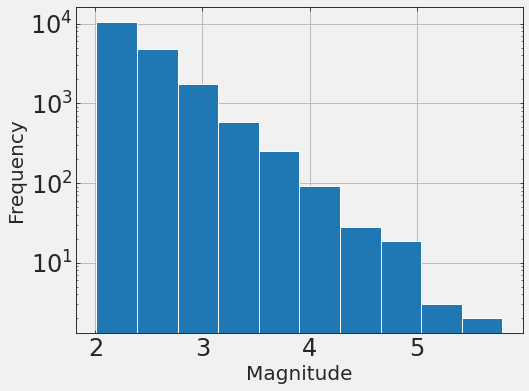

In [56]:
plt.figure(figsize=(8,6))
eqGoodData.mag.hist()
plt.yscale('log')
plt.xlabel('Magnitude')
plt.ylabel('Frequency');

In [57]:
eqGoodData['gaps'] = eqGoodData.datetime.diff() / np.timedelta64(1, 'ns')

In [58]:
eqGoodData = eqGoodData.iloc[1:]

In [59]:
eqGoodData.head()

,date,time,mag,datetime,gaps
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,1.443664e+13
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,3.047450e+13
5,1984/01/01,19:39:19.67,2.13,1984-01-01 19:39:19.670,5.988000e+10


In [60]:
eqGoodData.shape

(18028, 5)

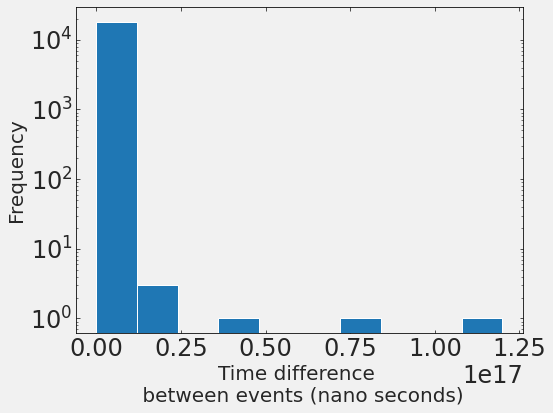

In [61]:
plt.figure(figsize=(8,6))
eqGoodData.gaps.plot(kind='hist')
plt.yscale('log')
plt.xlabel('Time difference \n between events (nano seconds)');

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

In [62]:
month_to_ns = np.timedelta64(31, 'D') / np.timedelta64(1, 'ns')

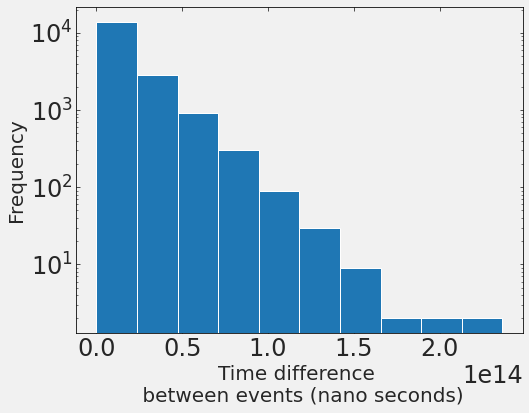

In [63]:
plt.figure(figsize=(8,6))
eqGoodData = eqGoodData[eqGoodData.gaps < month_to_ns]
eqGoodData.gaps.plot(kind='hist')
plt.yscale('log')
plt.xlabel('Time difference \n between events (nano seconds)');

In [64]:
eqGoodData.shape

(18018, 5)